In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import string
%matplotlib inline


In [5]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Speech.txt"
text = ""
with open('Speech.txt', 'r') as f:
    text = f.read()
print(text)

--2024-04-21 10:39:23--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Speech.txt
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 16.12.36.59, 16.12.36.127, 52.219.156.211, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|16.12.36.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6420 (6.3K) [text/plain]
Saving to: ‘Speech.txt’

Speech.txt          100%[===================>]   6.27K  --.-KB/s    in 0s      

2024-04-21 10:39:24 (75.8 MB/s) - ‘Speech.txt’ saved [6420/6420]

“ Good afternoon, and thank you and, wow. I am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today.
I’d like to extend my congratulations to each one of you, Octavia, Michelle, Kelly, Patty, and all fifty women that have been included in the impact report.
Your achievements not just inspire me but also so many others 

In [6]:
data = text.split("\n")
data[:6]


['“ Good afternoon, and thank you and, wow. I am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today.',
 'I’d like to extend my congratulations to each one of you, Octavia, Michelle, Kelly, Patty, and all fifty women that have been included in the impact report.',
 'Your achievements not just inspire me but also so many others to work harder to be better and to make a dent wherever we can.',
 'So, I’m very, very proud to be standing alongside you.',
 'So, in life you know there are moments when you stop and ask yourself: “How did I get here?”',
 'Like: “Why am I standing here?”']

In [7]:
print("Total lines:",len(data))


Total lines: 56


In [8]:
data = " ".join(data)
data[:20]

'“ Good afternoon, an'

In [9]:
def clean(doc):
    tokens = doc.split()
    table = str.maketrans("","",string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    return tokens


In [10]:
tokens = clean(data)


In [11]:
length = 50 + 1
lines = []
for i in range(length,len(tokens)):
    sequence = tokens[i-length:i]
    line = " ".join(sequence)
    lines.append(line)
print(len(lines))
print(lines[:6])

1067
['good afternoon and thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today like to extend my congratulations to each one of you octavia michelle kelly patty and all fifty women', 'afternoon and thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today like to extend my congratulations to each one of you octavia michelle kelly patty and all fifty women that', 'and thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today like to extend my congratulations to each one of you octavia michelle kelly patty and all fifty women that have', 'thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are be

In [12]:
print("First line:",lines[0])
print("First token:",tokens[0])

First line: good afternoon and thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today like to extend my congratulations to each one of you octavia michelle kelly patty and all fifty women
First token: good


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

In [16]:
sequences = tokenizer.texts_to_sequences(lines)
sequences = np.array(sequences)

In [17]:
X, y = sequences[:,:-1],sequences[:,-1]

In [18]:
print(X[0])
print(y[0])

[434 426   1 421  16   1 432   3 156  17 430   1  17 412   2  45 428  14
 426  56  37   6  16   1  76 424 155  75   7  36  74 412  44  46   2 418
   9 417   2 153  25   6  16 415 414 413 411   1  37 410]
75


In [19]:
vocab_size  = len(tokenizer.word_index) + 1


In [20]:
y = to_categorical(y,num_classes = vocab_size)


In [21]:
model = Sequential()
model.add(Embedding(vocab_size,50,input_length = 50))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100,activation = "relu"))
model.add(Dense(vocab_size,activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            21750     
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 435)               43935     
                                                                 
Total params: 216585 (846.04 KB)
Trainable params: 216585 (846.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer ="adam" , loss ="categorical_crossentropy"  ,metrics = ["accuracy"])

In [23]:
record = model.fit(X,y, epochs = 150)

Epoch 1/150
34/34 [==============================] - 7s 78ms/step - loss: 5.9435 - accuracy: 0.0066
Epoch 2/150
34/34 [==============================] - 4s 115ms/step - loss: 5.5264 - accuracy: 0.0375
Epoch 3/150
34/34 [==============================] - 5s 161ms/step - loss: 5.4279 - accuracy: 0.0328
Epoch 4/150
34/34 [==============================] - 3s 88ms/step - loss: 5.4015 - accuracy: 0.0440
Epoch 5/150
34/34 [==============================] - 6s 181ms/step - loss: 5.3973 - accuracy: 0.0337
Epoch 6/150
34/34 [==============================] - 3s 76ms/step - loss: 5.3863 - accuracy: 0.0440
Epoch 7/150
34/34 [==============================] - 3s 76ms/step - loss: 5.3721 - accuracy: 0.0384
Epoch 8/150
34/34 [==============================] - 3s 89ms/step - loss: 5.3354 - accuracy: 0.0440
Epoch 9/150
34/34 [==============================] - 3s 88ms/step - loss: 5.2182 - accuracy: 0.0319
Epoch 10/150
34/34 [==============================] - 3s 76ms/step - loss: 5.1111 - accuracy: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


loss at epoch 1: 5.9434638023376465
loss at epoch 150: 0.034568801522254944


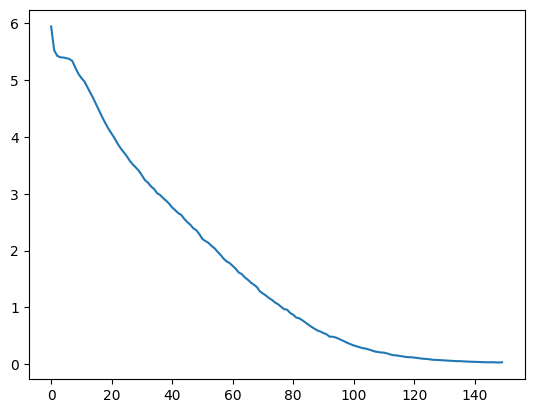

In [24]:
model.save('text_generate.h5')
model = load_model('text_generate.h5')


In [25]:
print(f"loss at epoch 1: {record.history['loss'][0]}")
print(f"loss at epoch 150: {record.history['loss'][149]}")


loss at epoch 1: 5.9434638023376465
loss at epoch 150: 0.034568801522254944


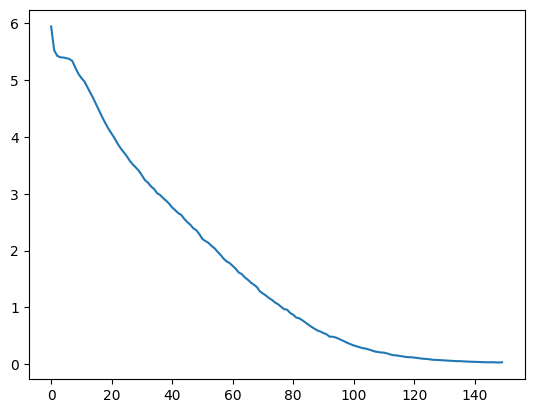

In [26]:
plt.plot(record.history['loss'])

In [29]:
from tensorflow.keras.models import Sequential

def generate_text_seq(model,tokenizer,text_seq_length,seed_text,n_words):
    if not isinstance(model, Sequential):
        raise TypeError("Model must be a Sequential model")

    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded],maxlen = text_seq_length,truncating = 'pre')

    y_predict = model.predict(encoded)[0]
    predicted_words = " "

    for i in range(n_words):
        predicted_word = tokenizer.index_word[y_predict[i]]
        predicted_words += " " + predicted_word

    return predicted_words

In [31]:
def generate_text_seq(model, tokenizer, text_seq_length, seed_text, n_words):
    # Initialize variables
    output_text = []
    input_text = seed_text

    # Generate n_words words
    for i in range(n_words):
        # Convert the input text to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        encoded_text = pad_sequences([encoded_text], maxlen=text_seq_length, truncating='pre')

        # Predict the next word
        y_predict = model.predict(encoded_text)
        predicted_word = tokenizer.index_word[np.argmax(y_predict)]

        # Update the input text with the predicted word
        input_text += " " + predicted_word

        # Add the predicted word to the output text
        output_text.append(predicted_word)

    # Return the generated text
    return " ".join(output_text)


In [32]:
generate_text_seq(model,tokenizer,50,seed_text,100)

1/1 [==============================] - 0s 37ms/step


'not just inspire me but also so many others to work harder to be better and to make a dent wherever we can so very very proud to be standing alongside you so in life you know there are moments when you stop and ask yourself did i get like am i standing well this is definitely one of those moments for me and i find myself going back to the beginning back to my roots i was born to incredible parents amazing parents who served as doctors in the indian army i was the first born and as far'